In [1]:
from preamble import *
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['savefig.bbox'] = "tight"

# Model evaluation and improvement

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
logreg.score(X_test, y_test)
# we predicted the correct class on 88% of the samples in X_test

0.88

## Cross-validation

In [3]:
plt.figure(figsize=(12, 2))
plt.title("cross_validation")
axes = plt.gca()
axes.set_frame_on(False)

n_folds = 5
n_samples = 25

n_samples_per_fold = n_samples / float(n_folds)


for i in range(n_folds):
    colors = ["w"] * n_folds
    colors[i] = "grey"
    plt.barh(bottom=range(n_folds), width=[n_samples_per_fold - 0.1] * n_folds,
             left=i * n_samples_per_fold, height=.6, color=colors, hatch="//")
axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1)
plt.ylabel("CV iterations")
plt.xlabel("Data points")
plt.xticks(np.arange(n_samples_per_fold / 2., n_samples, n_samples_per_fold), ["Fold %d" % x for x in range(1, n_folds + 1)])
plt.yticks(np.arange(n_folds) + .3, ["Split %d" % x for x in range(1, n_folds + 1)])
plt.legend(['Training data', 'Test data'], loc=(1.05, 0.4), frameon=False);
plt.savefig("images/06_cross_validation2.png")
plt.close()

![cross_validation](images/06_cross_validation2.png)

### Cross-validation in scikit-learn

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("cross-validation scores: ", scores)

cross-validation scores:  [ 0.961  0.922  0.958]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
scores

array([ 1.   ,  0.967,  0.933,  0.9  ,  1.   ])

In [6]:
scores.mean()

0.96000000000000019

## Benefits of cross-validation

## Stratified K-Fold cross-validation and other strategies

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# FIXME HIDE! FIXME LEGEND
fig, both_axes = plt.subplots(2, 1, figsize=(12, 5))
#plt.title("cross_validation_not_stratified")
axes = both_axes[0]
axes.set_title("Standard cross-validation with sorted class labels")

axes.set_frame_on(False)

n_folds = 3
n_samples = 150

n_samples_per_fold = n_samples / float(n_folds)


for i in range(n_folds):
    colors = ["w"] * n_folds
    colors[i] = "grey"
    axes.barh(bottom=range(n_folds), width=[n_samples_per_fold - 1] * n_folds, left=i * n_samples_per_fold, height=.6, color=colors, hatch="//")
    
axes.barh(bottom=[n_folds] * n_folds, width=[n_samples_per_fold - 1] * n_folds, left=np.arange(3) * n_samples_per_fold, height=.6, color="w")

axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1)
axes.set_ylabel("CV iterations")
axes.set_xlabel("Data points")
axes.set_xticks(np.arange(n_samples_per_fold / 2., n_samples, n_samples_per_fold))
axes.set_xticklabels(["Fold %d" % x for x in range(1, n_folds + 1)])
axes.set_yticks(np.arange(n_folds + 1) + .3)
axes.set_yticklabels(["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"])
for i in range(3):
    axes.text((i + .5) * n_samples_per_fold, 3.5, "Class %d" % i, horizontalalignment="center")


ax = both_axes[1]
ax.set_title("Stratified Cross-validation")
ax.set_frame_on(False)
ax.invert_yaxis()
ax.set_xlim(0, n_samples + 1)
ax.set_ylabel("CV iterations")
ax.set_xlabel("Data points")

ax.set_yticks(np.arange(n_folds + 1) + .3)
ax.set_yticklabels(["Split %d" % x for x in range(1, n_folds + 1)] + ["Class label"]);

n_subsplit = n_samples_per_fold / 3.
for i in range(n_folds):
    test_bars = ax.barh(bottom=[i] * n_folds, width=[n_subsplit - 1] * n_folds, left=np.arange(n_folds) * n_samples_per_fold + i * n_subsplit, height=.6, color="grey", hatch="//")

w = 2 * n_subsplit - 1
ax.barh(bottom=[0] * n_folds, width=[w] * n_folds, left=np.arange(n_folds) * n_samples_per_fold + (0 + 1) * n_subsplit, height=.6, color="w", hatch="//")
ax.barh(bottom=[1] * (n_folds + 1), width=[w / 2., w, w, w / 2.], left=np.maximum(0, np.arange(n_folds + 1) * n_samples_per_fold - n_subsplit), height=.6, color="w", hatch="//")
training_bars = ax.barh(bottom=[2] * n_folds, width=[w] * n_folds, left=np.arange(n_folds) * n_samples_per_fold , height=.6, color="w", hatch="//")


    
ax.barh(bottom=[n_folds] * n_folds, width=[n_samples_per_fold - 1] * n_folds, left=np.arange(n_folds) * n_samples_per_fold, height=.6, color="w")

for i in range(3):
    ax.text((i + .5) * n_samples_per_fold, 3.5, "Class %d" % i, horizontalalignment="center")
ax.set_ylim(4, -0.1)
plt.legend([training_bars[0], test_bars[0]], ['Training data', 'Test data'], loc=(1.05, 1), frameon=False);

fig.tight_layout()
plt.savefig("images/06_stratified_kfold.png")
plt.close()

![stratified_kfold](images/06_stratified_kfold.png)

## More control over cross-validation

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_folds=5)

In [10]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([ 1.   ,  0.933,  0.433,  0.967,  0.433])

In [11]:
kfold = KFold(n_folds=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([ 0.,  0.,  0.])

In [12]:
kfold = KFold(n_folds=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([ 0.9 ,  0.96,  0.96])

### Leave-One-Out cross-validation

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("number of cv iterations: ", len(scores))
print("mean accuracy: ", scores.mean())

number of cv iterations:  150
mean accuracy:  0.953333333333


### Shuffle-Split cross-validation

In [14]:
# FIXME HIDE THIS

from sklearn.model_selection import ShuffleSplit
plt.figure(figsize=(10, 2))
plt.title("ShuffleSplit with 10 points, train_size=5, test_size=2, n_iter=4")

axes = plt.gca()
axes.set_frame_on(False)

n_folds = 10
n_samples = 10
n_iter = 4
n_samples_per_fold = 1

ss = ShuffleSplit(n_iter=4, train_size=5, test_size=2, random_state=43)
mask = np.zeros((n_iter, n_samples))
for i, (train, test) in enumerate(ss.split(range(10))):
    mask[i, train] = 1
    mask[i, test] = 2


for i in range(n_folds):
    # test is grey
    colors = ["grey"  if x == 2 else "white" for x in mask[:, i]]
    # not selected has no hatch
    
    boxes = axes.barh(bottom=range(n_iter), width=[1 - 0.1] * n_iter, left=i * n_samples_per_fold, height=.6, color=colors, hatch="//")
    for j in np.where(mask[:, i] == 0)[0]:
        boxes[j].set_hatch("")

axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1)
axes.set_ylabel("CV iterations")
axes.set_xlabel("Data points")
axes.set_xticks(np.arange(n_samples) + .5)
axes.set_xticklabels(np.arange(1, n_samples + 1))
axes.set_yticks(np.arange(n_iter) + .3)
axes.set_yticklabels(["Split %d" % x for x in range(1, n_iter + 1)]);
# legend hacked for this random state
plt.legend([boxes[1], boxes[0], boxes[2]], ["Training set", "Test set", "Not selected"], loc=(1, .3));
plt.tight_layout()
plt.savefig("images/06_shuffle_split.png")
plt.close()

![shuffle_split](images/06_shuffle_split.png)

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_iter=10)
cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

array([ 0.947,  0.933,  0.933,  0.973,  0.933,  0.92 ,  0.827,  0.96 ,
        0.987,  0.92 ])

### Cross-validation with groups

In [16]:
# FIXME HIDE THIS
from sklearn.model_selection import LabelKFold
labels = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

plt.figure(figsize=(10, 2))
plt.title("LabelKFold")

axes = plt.gca()
axes.set_frame_on(False)

n_folds = 12
n_samples = 12
n_iter = 3
n_samples_per_fold = 1

cv = LabelKFold(n_folds=3)
mask = np.zeros((n_iter, n_samples))
for i, (train, test) in enumerate(cv.split(range(12), labels=labels)):
    mask[i, train] = 1
    mask[i, test] = 2


for i in range(n_folds):
    # test is grey
    colors = ["grey"  if x == 2 else "white" for x in mask[:, i]]
    # not selected has no hatch
    
    boxes = axes.barh(bottom=range(n_iter), width=[1 - 0.1] * n_iter, left=i * n_samples_per_fold, height=.6, color=colors, hatch="//")
    for j in np.where(mask[:, i] == 0)[0]:
        boxes[j].set_hatch("")
        
axes.barh(bottom=[n_iter] * n_folds, width=[1 - 0.1] * n_folds, left=np.arange(n_folds) * n_samples_per_fold, height=.6, color="w")

for i in range(12):
    axes.text((i + .5) * n_samples_per_fold, 3.5, "%d" % labels[i], horizontalalignment="center")
#ax.set_ylim(4, -0.1)
        
axes.invert_yaxis()
axes.set_xlim(0, n_samples + 1)
axes.set_ylabel("CV iterations")
axes.set_xlabel("Data points")
axes.set_xticks(np.arange(n_samples) + .5)
axes.set_xticklabels(np.arange(1, n_samples + 1))
axes.set_yticks(np.arange(n_iter) + .3)
axes.set_yticklabels(["Split %d" % x for x in range(1, n_iter + 1)] + ["labels"]);
# legend hacked for this random state
plt.legend([boxes[1], boxes[0], boxes[2]], ["Training set", "Test set"], loc=(1, .3));
plt.tight_layout()
plt.savefig("images/06_label_kfold.png")
plt.close()

![label_kfold](images/06_label_kfold.png)

In [17]:
from sklearn.model_selection import LabelKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group, then the next four etc.
labels = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
cross_val_score(logreg, X, y, labels, cv=LabelKFold(n_folds=3))

array([ 0.75 ,  0.8  ,  0.667])

## Grid Search

### Simple Grid-Search

In [18]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: %d   size of test set: %d" % (X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("best score: ", best_score)
print("best parameters: ", best_parameters)

Size of training set: 112   size of test set: 38
best score:  0.973684210526
best parameters:  {'C': 100, 'gamma': 0.001}


In [19]:
best_score

0.97368421052631582

### The danger of overfitting the parameters and the validation set

In [20]:
plt.figure(figsize=(15, 1))
axis = plt.gca()
bars = axis.barh([0, 0, 0], [11.9, 2.9, 4.9], left=[0, 12, 15], color=['white', 'grey', 'grey'], hatch="//")
bars[2].set_hatch(r"")
axis.set_yticks(())
axis.set_frame_on(False)
axis.set_ylim(-.1, .8)
axis.set_xlim(-0.1, 20.1)
axis.set_xticks([6, 13.3, 17.5])
axis.set_xticklabels(["training set", "validation set", "test set"], fontdict={'fontsize': 20});
axis.tick_params(length=0, labeltop=True, labelbottom=False)
axis.text(6, -.3, "Model fitting", fontdict={'fontsize': 13}, horizontalalignment="center")
axis.text(13.3, -.3, "Parameter selection", fontdict={'fontsize': 13}, horizontalalignment="center")
axis.text(17.5, -.3, "Evaluation", fontdict={'fontsize': 13}, horizontalalignment="center")
plt.savefig("images/06_threefold_split.png")
plt.close()

![threefold_split](images/06_threefold_split.png)

In [21]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: %d   size of validation set: %d   size of test set: %d" % (X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set, and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("best score on validation set: ", best_score)
print("best parameters: ", best_parameters)
print("test set score with best parameters: ", test_score)

Size of training set: 84   size of validation set: 28   size of test set: 38
best score on validation set:  0.964285714286
best parameters:  {'C': 10, 'gamma': 0.001}
test set score with best parameters:  0.921052631579


### Grid-search with cross-validation

In [22]:
# reference: manual_grid_search_cv
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_trainval, y_trainval)
scores = grid_search.grid_scores_[15:]

best = np.argmax([x.mean_validation_score for x in scores])
plt.figure(figsize=(10, 3))
plt.xlim(-1, len(scores))
plt.ylim(0, 1.1)
for i, score in enumerate(scores):
    marker_cv, = plt.plot([i] * 5, score.cv_validation_scores, '^', c='gray', markersize=5, alpha=.5)
    marker_mean, = plt.plot(i, score.mean_validation_score, 'v', c='none', alpha=1, markersize=10)
    if i == best:
        marker_best, = plt.plot(i, score.mean_validation_score, 'o', c='red', fillstyle="none", alpha=1, markersize=20, markeredgewidth=3)

plt.xticks(range(len(scores)), [str(score.parameters).strip("{}").replace("'", "") for score in scores], rotation=90);
plt.ylabel("validation accuracy")
plt.xlabel("parameter settings")
plt.legend([marker_cv, marker_mean, marker_best], ["cv accuracy", "mean accuracy", "best parameter setting"], loc=(1.05, .4))
plt.savefig("images/06_cross_val_selection.png")
plt.close()

![cross_val_selection](images/06_cross_val_selection.png)

In [24]:
plt.figure(figsize=(10, 3))
axes = plt.gca()
axes.yaxis.set_visible(False)
axes.xaxis.set_visible(False)
axes.set_frame_on(False)
#axes.invert_yaxis()
def draw(ax, text, start, target=None):
    if target is not None:
        patchB = target.get_bbox_patch()
        end = target.get_position()
    else:
        end = start
        patchB = None
    annotation = ax.annotate(text, end, start, xycoords='axes pixels', textcoords='axes pixels', size=20,
                arrowprops=dict(arrowstyle="-|>", fc="w", ec="k", patchB=patchB,
                               connectionstyle="arc3,rad=0.0"),
                bbox=dict(boxstyle="round", fc="w"), horizontalalignment="center", verticalalignment="center")
    plt.draw()
    return annotation

step = 100
grr = 400

final_evaluation = draw(axes, "final evaluation", (5 * step, grr - 3 * step))
retrained_model = draw(axes, "retrained model", (3 * step, grr - 3 * step), final_evaluation)
best_parameters = draw(axes, "best parameters", (.5 * step, grr - 3 * step), retrained_model)
cross_validation = draw(axes, "cross validation", (.5 * step, grr - 2 * step), best_parameters)
parameters = draw(axes, "parameter grid", (0.0, grr - 0), cross_validation)
training_data = draw(axes, "training data", (2 * step, grr - step), cross_validation)
draw(axes, "training data", (2 * step, grr - step), retrained_model)
test_data = draw(axes, "test data", (5 * step, grr - step), final_evaluation)
draw(axes, "data set", (3.5 * step, grr - 0.0), training_data)
data_set = draw(axes, "data set", (3.5 * step, grr - 0.0), test_data)
plt.ylim(0, 1)
plt.xlim(0, 1.5)
plt.savefig("images/06_grid_search_overview.png")
plt.close()

![grid_search_overview](images/06_grid_search_overview.png)

In [25]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [29]:
grid_search.score(X_test, y_test)

0.97368421052631582

In [30]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.01}
0.973214285714


In [31]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Analyzing the result of cross-validation

In [32]:
grid_search.grid_scores_

[mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 0.001},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 0.01},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 0.1},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 1},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 10},
 mean: 0.36607, std: 0.01137, params: {'C': 0.001, 'gamma': 100},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 0.1},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 1},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 10},
 mean: 0.36607, std: 0.01137, params: {'C': 0.01, 'gamma': 100},
 mean: 0.36607, std: 0.01137, params: {'C': 0.1, 'gamma': 0.001},
 mean: 0.69643, std: 0.01333, params: {'C': 0.1, 'gamma': 0.01},
 mean: 0.91964, std: 0.04442, params: {'C': 0.1, 'gamma': 0.1},
 mean: 0.95536, std

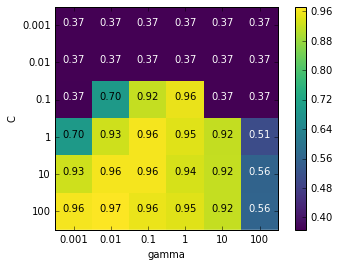

In [34]:
import itertools

scores = [score.mean_validation_score for score in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 6)

# plot the mean cross-validation scores
plt.imshow(scores, cmap='viridis')
plt.colorbar()
plt.xlabel("gamma")
plt.ylabel("C")
plt.xticks(range(len(param_grid['gamma'])), param_grid['gamma'])
plt.yticks(range(len(param_grid['C'])), param_grid['C']);
for i, j in itertools.product(range(scores.shape[0]), range(scores.shape[1])):
    plt.text(j, i, "%.2f" % scores[i, j],
             horizontalalignment="center", color="w" if scores[i, j] < .6 else "k")

gridsearch_failures


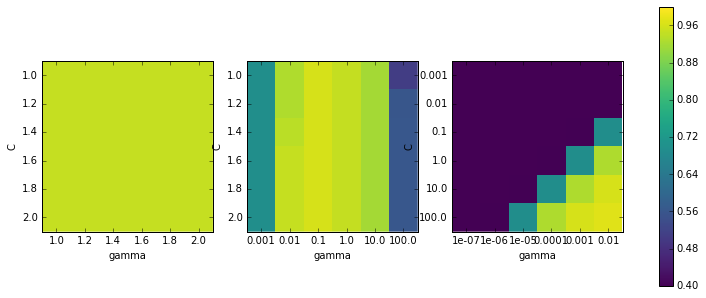

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = [score.mean_validation_score for score in grid_search.grid_scores_]
    scores = np.array(scores).reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = ax.imshow(scores, cmap='viridis', vmin=.4, vmax=1)
    ax.set_xlabel("gamma")
    ax.set_xticks(range(len(param_grid['gamma'])))
    ax.set_xticklabels(param_grid['gamma'])

    ax.set_ylabel("C")
    ax.set_yticks(range(len(param_grid['C'])))
    ax.set_yticklabels(param_grid['C'])
    
plt.colorbar(scores_image, ax=axes.tolist())
print("gridsearch_failures")

### Using different cross-validation strategies with grid-search

### Nested cross-validation

In [36]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.967  1.     0.967  0.967  1.   ]
Mean cross-validation score:  0.98


In [37]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation:
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return outer_scores

In [38]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))

[0.96666666666666667, 1.0, 0.96666666666666667, 0.96666666666666667, 1.0]

### Parallelizing cross-validation and grid-search

## Evaluation Metrics and scoring
### Keep the end-goal in mind

### Metrics for binary classification
#### Kinds of Errors
#### Imbalanced datasets

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [40]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("predicted labels: %s" % np.unique(pred_most_frequent))
print("score: %f" % dummy_majority.score(X_test, y_test))

predicted labels: [False]
score: 0.895556


In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
tree.score(X_test, y_test)

0.9177777777777778

In [42]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: %f" % dummy.score(X_test, y_test))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: %f" % logreg.score(X_test, y_test))

dummy score: 0.831111
logreg score: 0.977778


#### Confusion matrices

In [43]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[401   2]
 [  8  39]]


(0, 1)

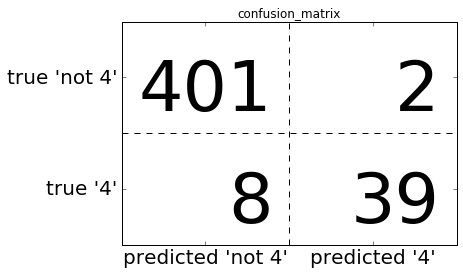

In [44]:
plt.title("confusion_matrix")
plt.text(0.45, .6, confusion[0, 0], size=70, horizontalalignment='right')
plt.text(0.45, .1, confusion[1, 0], size=70, horizontalalignment='right')
plt.text(.95, .6, confusion[0, 1], size=70, horizontalalignment='right')
plt.text(.95, 0.1, confusion[1, 1], size=70, horizontalalignment='right')
plt.xticks([.25, .75], ["predicted 'not 4'", "predicted '4'"], size=20)
plt.yticks([.25, .75], ["true '4'", "true 'not 4'"], size=20);
plt.plot([.5, .5], [0, 1], '--', c='k')
plt.plot([0, 1], [.5, .5], '--', c='k')

plt.xlim(0, 1)
plt.ylim(0, 1)

(0, 1)

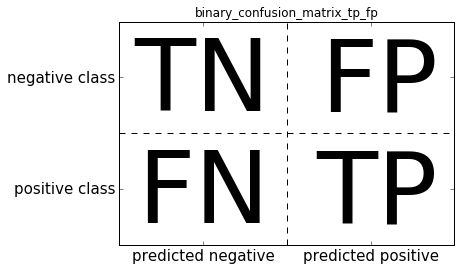

In [45]:
plt.title("binary_confusion_matrix_tp_fp")
plt.text(0.45, .6, "TN", size=100, horizontalalignment='right')
plt.text(0.45, .1, "FN", size=100, horizontalalignment='right')
plt.text(.95, .6, "FP", size=100, horizontalalignment='right')
plt.text(.95, 0.1, "TP", size=100, horizontalalignment='right')
plt.xticks([.25, .75], ["predicted negative", "predicted positive"], size=15)
plt.yticks([.25, .75], ["positive class", "negative class"], size=15);
plt.plot([.5, .5], [0, 1], '--', c='k')
plt.plot([0, 1], [.5, .5], '--', c='k')

plt.xlim(0, 1)
plt.ylim(0, 1)

In [46]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[373  30]
 [ 42   5]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


##### Relation to accuracy

#### Precision, recall and f-score

In [47]:
from sklearn.metrics import f1_score
print("f1 score most frequent: %.2f" % f1_score(y_test, pred_most_frequent))
print("f1 score dummy: %.2f" % f1_score(y_test, pred_dummy))
print("f1 score tree: %.2f" % f1_score(y_test, pred_tree))
print("f1 score: %.2f" % f1_score(y_test, pred_logreg))

f1 score most frequent: 0.00
f1 score dummy: 0.12
f1 score tree: 0.55
f1 score: 0.89


/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      0.93      0.91       403
       nine       0.14      0.11      0.12        47

avg / total       0.82      0.84      0.83       450



In [50]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



#### Taking uncertainty into account

In [51]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=(400, 50), centers=2,
                  cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.suptitle("decision_threshold")
axes[0, 0].set_title("training data")
axes[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2)

svc = SVC(gamma=.05).fit(X_train, y_train)
axes[0, 1].set_title("decision with threshold 0")
axes[0, 1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2)
mglearn.tools.plot_2d_scores(svc, X_train,
                             function="decision_function", alpha=.7, ax=axes[0, 1])
mglearn.tools.plot_2d_separator(svc, X_train, linewidth=3, ax=axes[0, 1])
axes[0, 2].set_title("decision with threshold -0.8")
axes[0, 2].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2)
mglearn.tools.plot_2d_separator(svc, X_train, linewidth=3, ax=axes[0, 2],
                                threshold=-.8)
mglearn.tools.plot_2d_scores(svc, X_train,
                             function="decision_function", alpha=.7, ax=axes[0, 2])


#axes[1, 0].scatter(X_train[mask, 0], np.zeros(bla), c=y_train[mask], cmap=mglearn.cm2, alpha=.1, s=100)
axes[1, 0].set_visible(False)

mask = np.abs(X_train[:, 1] - 7) < 5
bla = np.sum(mask)

line = np.linspace(X_train.min(), X_train.max(), 100)
axes[1, 1].set_title("Cross-section with threshold 0")
axes[1, 1].plot(line, svc.decision_function(np.c_[line, 10 * np.ones(100)]), c='k')
contour = (svc.decision_function(np.c_[line, 10 * np.ones(100)]) > 0).reshape(1, -1).repeat(10, axis=0)
axes[1, 1].contourf(line, np.linspace(-1.5, 1.5, 10), contour, alpha=0.2, cmap=mglearn.cm2)
axes[1, 1].scatter(X_train[mask, 0], np.zeros(bla), c=y_train[mask], cmap=mglearn.cm2, alpha=.1, s=100)
axes[1, 1].set_xlim(X_train.min(), X_train.max())
axes[1, 1].set_ylim(-1.5, 1.5)
axes[1, 1].set_xticks(())
axes[1, 1].set_ylabel("Decision value")

contour2 = (svc.decision_function(np.c_[line, 10 * np.ones(100)]) > -.8).reshape(1, -1).repeat(10, axis=0)
axes[1, 2].set_title("Cross-section with threshold -0.8")
axes[1, 2].contourf(line, np.linspace(-1.5, 1.5, 10), contour2, alpha=0.2, cmap=mglearn.cm2)
axes[1, 2].scatter(X_train[mask, 0], np.zeros(bla), c=y_train[mask], cmap=mglearn.cm2, alpha=.1, s=100)
axes[1, 2].plot(line, svc.decision_function(np.c_[line, 10 * np.ones(100)]), c='k')
axes[1, 2].set_xlim(X_train.min(), X_train.max())
axes[1, 2].set_ylim(-1.5, 1.5);
axes[1, 2].set_xticks(())
axes[1, 2].set_ylabel("Decision value")
plt.savefig("images/06_decision_threshold.png")
plt.close()

![decision_threshold](images/06_decision_threshold.png)

In [52]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [53]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [54]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



#### Precision-Recall curves and ROC curves

In [55]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,
                                                       svc.decision_function(X_test))

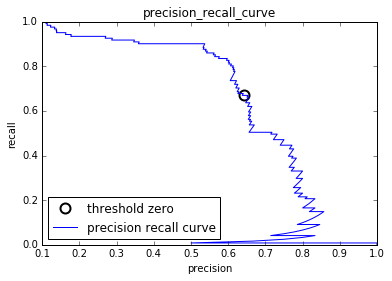

In [56]:
# create a similar dataset as before, but with more samples to get a smoother curve
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("precision_recall_curve");
plt.legend(loc="best")

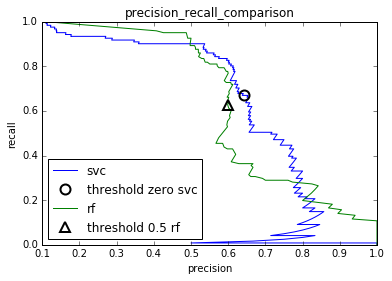

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10,
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")
plt.title("precision_recall_comparison");

In [58]:
print("f1_score of random forest: %f" % f1_score(y_test, rf.predict(X_test)))
print("f1_score of svc: %f" % f1_score(y_test, svc.predict(X_test)))

f1_score of random forest: 0.609756
f1_score of svc: 0.655870


In [59]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("average precision of random forest: %f" % ap_rf)
print("average precision of svc: %f" % ap_svc)

average precision of random forest: 0.665737
average precision of svc: 0.662636


#### Receiver Operating Characteristics (ROC) and AUC

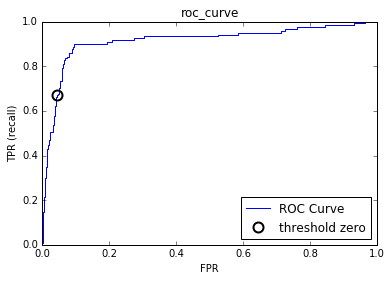

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("roc_curve");
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

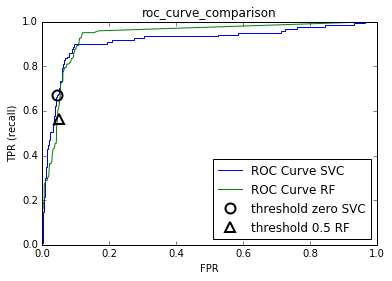

In [61]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("roc_curve_comparison");
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [62]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: %f" % rf_auc)
print("AUC for SVC: %f" % svc_auc)

AUC for Random Forest: 0.936695
AUC for SVC: 0.916294


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 0.90
gamma = 0.01  accuracy = 0.90  AUC = 1.00


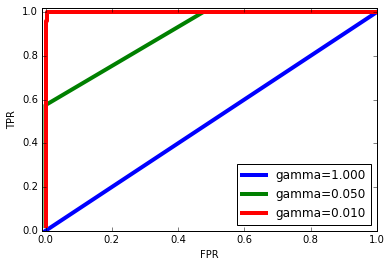

In [63]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = %.02f  accuracy = %.02f  AUC = %.02f" % (gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma=%.03f" % gamma, linewidth=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

### Multi-class classification

In [64]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
print("confusion matrix:")
print(confusion_matrix(y_test, pred))

accuracy: 0.953
confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


In [65]:
import itertools

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.gray_r):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
plot_confusion_matrix(confusion_matrix(y_test, pred))
plt.savefig("images/06_multi_label_confusion_matrix.png")
plt.close()

![multi_label_confusion_matrix](images/06_multi_label_confusion_matrix.png)

In [66]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [67]:
print("micro average f1 score: %f" % f1_score(y_test, pred, average="micro"))
print("macro average f1 score: %f" % f1_score(y_test, pred, average="macro"))

micro average f1 score: 0.953333
macro average f1 score: 0.954000


### Regression metrics

## Using evaluation metrics in model selection

In [68]:
# default scoring for classification is accuracy
print("default scoring ", cross_val_score(SVC(), digits.data, digits.target == 9))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("explicit accuracy scoring ", explicit_accuracy)
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC scoring ", roc_auc)

default scoring  [ 0.9  0.9  0.9]
explicit accuracy scoring  [ 0.9  0.9  0.9]
AUC scoring  [ 0.994  0.99   0.996]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)):", grid.best_score_)
print("Test set AUC: %.3f" % roc_auc_score(y_test, grid.decision_function(X_test)))
print("Test set accuracy %.3f: " % grid.score(X_test, y_test))

# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC):", grid.best_score_)
print("Test set AUC: %.3f" % roc_auc_score(y_test, grid.decision_function(X_test)))
print("Test set accuracy %.3f: " % grid.score(X_test, y_test))


Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970304380104
Test set AUC: 0.992
Test set accuracy 0.973: 

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997467845028
Test set AUC: 1.000
Test set accuracy 1.000: 


/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:52: DeprecationWarning: Class ChangedBehaviorWarning is deprecated; ChangedBehaviorWarning has been moved into the sklearn.exceptions module. It will not be available here from version 0.19
  warnings.warn(msg, category=DeprecationWarning)
/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:424: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


In [70]:
from sklearn.metrics.scorer import SCORERS
print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


## Summary and outlook